# **Object Detection - Models Testing - YOLO**

---

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
%matplotlib inline

In [2]:
yolo = YOLO("../..//runs/detect/train/weights/best.pt")
results = yolo.val(data="../../data/dataset.yaml", split="test", save=True)

Ultralytics 8.3.133  Python-3.12.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 58.736.1 MB/s, size: 445.8 KB)


val: Scanning C:\Users\mateu\Downloads\UA\Cadeiras\Seminário\Object_Detection\data\split_data\labels\test... 1673 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1673/1673 [00:03<00:00, 529.36it/s]

val: New cache created: C:\Users\mateu\Downloads\UA\Cadeiras\Seminrio\Object_Detection\data\split_data\labels\test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:20<00:00,  5.17it/s]


                   all       1673      13324      0.991      0.978      0.991       0.86
                  blue       1409       2858      0.992       0.96      0.979       0.86
                 green       1419       2799      0.988      0.971      0.994      0.869
                orange       1336       2618      0.995       0.99      0.995      0.865
                   red       1168       2296      0.986      0.984      0.994      0.862
                yellow       1389       2753      0.992      0.985      0.995      0.843
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to C:\Users\mateu\Downloads\UA\Cadeiras\Seminrio\Object_Detection\runs\detect\val


In [3]:
test_image_path = "../../data/split_data/images/test/frame_0_aug_0.jpg"
results = yolo(test_image_path, conf=0.5)[0]
print("Results:")
print(results)


image 1/1 c:\Users\mateu\Downloads\UA\Cadeiras\Seminrio\Object_Detection\models\notebooks\..\..\data\split_data\images\test\frame_0_aug_0.jpg: 480x640 2 blues, 2 greens, 2 oranges, 2 reds, 2 yellows, 71.0ms
Speed: 6.3ms preprocess, 71.0ms inference, 6.7ms postprocess per image at shape (1, 3, 480, 640)
Results:
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'blue', 1: 'green', 2: 'orange', 3: 'red', 4: 'yellow'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
       

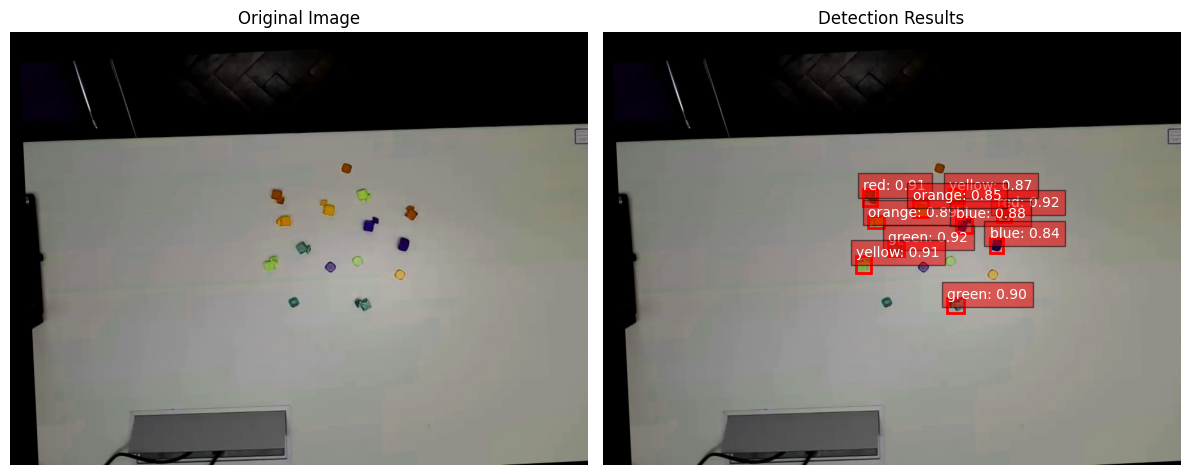

In [4]:
img = mpimg.imread(test_image_path)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show image with detection results
axs[1].imshow(img)
for box, cls, conf in zip(results.boxes.xyxy.cpu().numpy(), results.boxes.cls.cpu().numpy(), results.boxes.conf.cpu().numpy()):
    x1, y1, x2, y2 = box
    axs[1].add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2))
    label = f"{results.names[int(cls)]}: {conf:.2f}"
    axs[1].text(x1, y1, label, color='white', fontsize=10, bbox=dict(facecolor='red', alpha=0.5))
axs[1].set_title("Detection Results")
axs[1].axis('off')

plt.tight_layout()
plt.show()